In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv('kc_house_data.csv')
Y = dataset[['price']]
X = dataset.drop(['price', 'id', 'date'],  axis=1)

In [2]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
x = X.values
y = Y.values

In [4]:
def featureNormalize(x_m):
    mu = np.zeros((1,x_m.shape[1]))
    sigma = np.zeros((1,x_m.shape[1]))
    x_norm = x_m.astype(float)
    
    for i in range(0,len(mu)+1):
        mu[:,i] = x_m[:,i].mean()
        sigma[:,i] = x_m[:,i].std()
        x_norm[:,i] = (x_m[:,i] - mu[:,i])/sigma[:,i]
    return (x_norm, mu, sigma)

In [5]:
x_norm, mu, sigma = featureNormalize(x)
x_norm = np.concatenate((np.ones(len(x_norm)).reshape(-1,1), x_norm), axis=1)

In [6]:
def computeCost_m(x, y, theta):
    m = len(y)
    h_x = np.dot(x, theta)
    j = np.sum(np.square(h_x - y))/(2*m)
    return j

In [7]:
theta_init = np.zeros((19, 1))
computeCost_m(x_norm, Y, theta_init)

price    2.132357e+11
dtype: float64

In [8]:
# MULTIPLE LINEAR REGRESSION ==> HARD_CODED

def gradientDescentMulti(X, Y, theta, alpha, num_iters):
    m = len(Y)
    p = np.copy(X)
    t = np.copy(theta)
    j = []
    print('Running Gradient Descent')
    for i in range(0,num_iters+1):
        cost = computeCost_m(p, Y, t)
        j.append(cost)
        h_x = np.dot(p, t)
        err = h_x - Y
        for f in range(theta.size):
            t[f] = t[f] - alpha/m *(np.sum((np.dot(p[:,f].T, err))))
    return j, t

Running Gradient Descent


D:\ANACONDA\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: overflow encountered in square
  result = func(self.values, **kwargs)


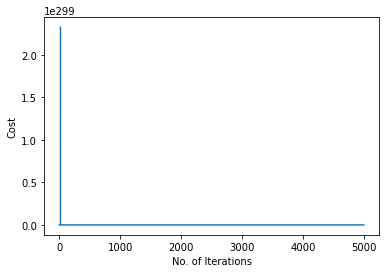

In [9]:
# theta_init = np.zeros((3, 1))
alpha = 0.01
num_iters = 5000
theta_init = np.zeros((19, 1))
cost, theta_final = gradientDescentMulti(x_norm, Y, theta_init, alpha, num_iters)

plt.figure()
plt.plot(cost)
plt.xlabel('No. of Iterations')
plt.ylabel('Cost')
plt.show()

In [10]:
theta_final

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])

In [11]:
theta_init

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [12]:
# MULTIPLE LINEAR REGRESSION ==> USING SCIKIT LIBRARY

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

mlr = LinearRegression()
sc_x = StandardScaler()
X_new = sc_x.fit_transform(x)

In [13]:
mlr.fit(X_new, Y)
y_hat = mlr.predict(X_new)

In [14]:
mlr.score(X_new, Y)

0.6997471890109157

In [15]:
mlr.intercept_

array([540088.14176653])

In [16]:
mlr.coef_

array([[-33264.32545782,  31687.07437464,  81812.50710964,
          5326.46629074,   3612.19920732,  50434.93843527,
         40514.99473763,  17169.88047514, 112712.65585307,
         76305.51997634,  27005.67955588, -76963.1122356 ,
          7958.11945582, -31161.66927787,  83517.09842808,
        -30239.34618464,  14859.89955603, -10447.48009171]])